In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [2]:
group_2 = [
    'vk_2_eg', 'stahl_folder', 'r707lv_f4032', 
    'r707lv_f4034', 'r707lv_vari_air', 'og_3'
]

### Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

In [3]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.076, 0.111) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.195, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_long_periodic = seasonal_periodic_long + seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic * local_variation

In [4]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('vk_2_eg_10T', 10, True)

Iter 1 , Loss = 1.5259582261315472 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.4925095664882222 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.4607949247811278 , Noise = 0.5982680916786194
Iter 4 , Loss = 1.4316963767976936 , Noise = 0.5545802712440491
Iter 5 , Loss = 1.4046295380653269 , Noise = 0.5134649872779846
Iter 6 , Loss = 1.3799156604266416 , Noise = 0.47494447231292725
Iter 7 , Loss = 1.3538073267872555 , Noise = 0.43903234601020813
Iter 8 , Loss = 1.3416912702880242 , Noise = 0.4056197702884674
Iter 9 , Loss = 1.3189057523310614 , Noise = 0.3749314844608307
Iter 10 , Loss = 1.297927932233656 , Noise = 0.3467009961605072
Iter 11 , Loss = 1.2809305347613034 , Noise = 0.3206762969493866
Iter 12 , Loss = 1.2128102834081471 , Noise = 0.29666733741760254
Iter 13 , Loss = 1.1966340917052503 , Noise = 0.27362340688705444
Iter 14 , Loss = 1.196501233881392 , Noise = 0.2518124580383301
Iter 15 , Loss = 1.1509982797859912 , Noise = 0.2313832938671112
Iter 16 , Loss = 1.1580586550273

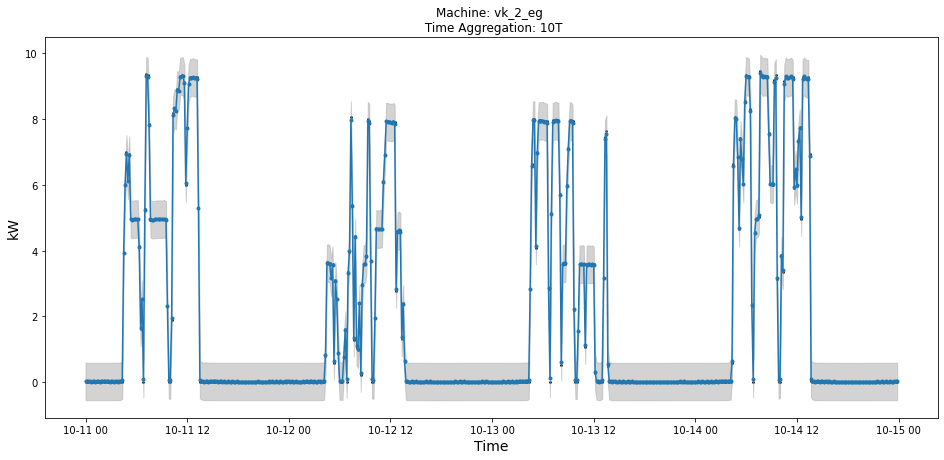

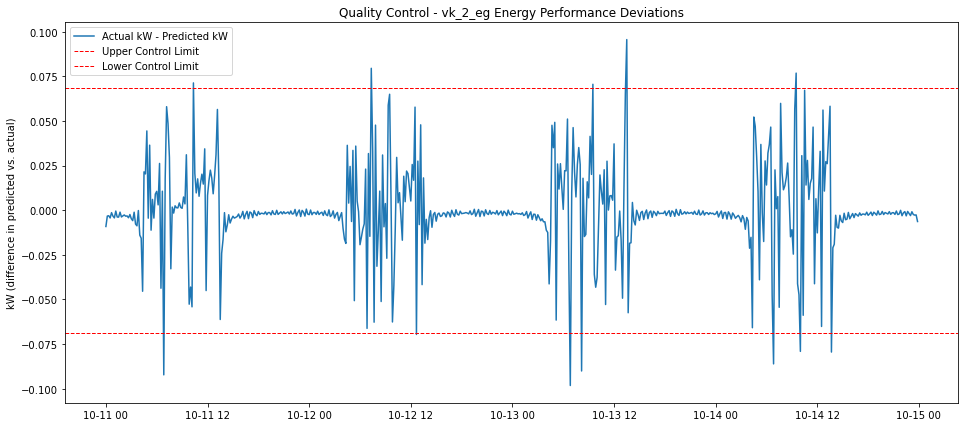

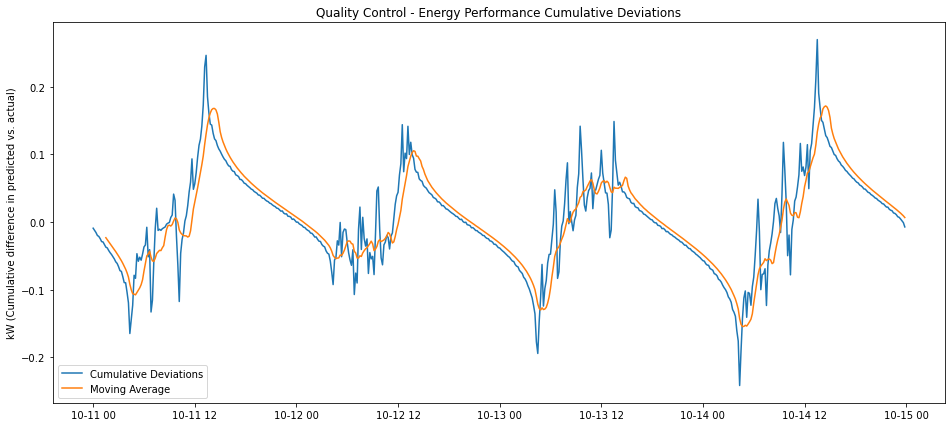

Abnormal High Energy Consumption
---------------------------------


Abnormal Low Energy Consumption
---------------------------------


In [5]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='10T',
    machine='vk_2_eg',
    update_score=False
)   

In [6]:
mse, mape

(11.746777583916447, 56.10638981112032)

### 30T

In [15]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.083, 0.126) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.167, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation


In [13]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('vk_2_eg_30T', 30, True)

Iter 1 , Loss = 1.1187954086354548 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0865628357118675 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.0560853929274148 , Noise = 0.5982447266578674
Iter 4 , Loss = 1.0304860399699605 , Noise = 0.5544843673706055
Iter 5 , Loss = 1.0117754274215345 , Noise = 0.5132205486297607
Iter 6 , Loss = 0.9970697526120343 , Noise = 0.4744892120361328
Iter 7 , Loss = 0.9822369494545572 , Noise = 0.4383242726325989
Iter 8 , Loss = 0.9660437238736961 , Noise = 0.4047090709209442
Iter 9 , Loss = 0.9488271133747879 , Noise = 0.37357228994369507
Iter 10 , Loss = 0.931816777493602 , Noise = 0.3448084592819214
Iter 11 , Loss = 0.9169481087050633 , Noise = 0.31831008195877075
Iter 12 , Loss = 0.9058633496568383 , Noise = 0.2940017580986023
Iter 13 , Loss = 0.8982433971800282 , Noise = 0.2718595862388611
Iter 14 , Loss = 0.8920147992534244 , Noise = 0.2518974542617798
Iter 15 , Loss = 0.8857492467339861 , Noise = 0.23413120210170746
Iter 16 , Loss = 0.8797637269307

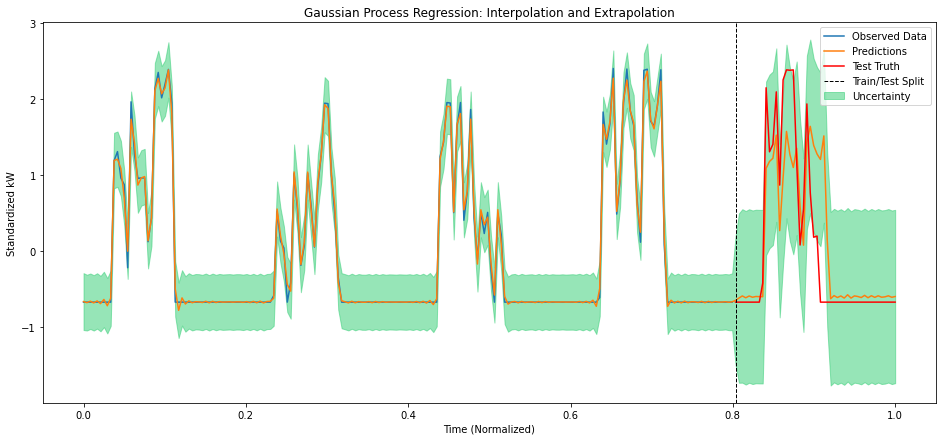

In [16]:
model, likelihood, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='vk_2_eg',
    update_score=False
)   

In [17]:
mse, mape

(0.4244654986824525, 0.732304612797901)